In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
from scipy import stats
# %matplotlib inline
pd.options.display.max_columns = None
def increase_figsize(N, plt):
    params = plt.gcf()
    axes = params.get_axes()
    plSize = params.get_size_inches()
    params.set_size_inches( (plSize[0]*N, plSize[1]*N) )
def increase_figsize2(N, fig):
    params = fig
    axes = params.get_axes()
    plSize = params.get_size_inches()
    params.set_size_inches( (plSize[0]*N, plSize[1]*N) )
def increase_size_by(N, fontsize, plt):
    params = plt.gcf()
    axes = params.get_axes()
    plSize = params.get_size_inches()
    params.set_size_inches( (plSize[0]*N, plSize[1]*N) )
    for ax in axes:
        for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
                ax.get_xticklabels() + ax.get_yticklabels()):
            item.set_fontsize(fontsize)
cbf = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
'#999999', '#e41a1c', '#dede00']
cbf_map = mpl.colors.ListedColormap(cbf)
rc = {'axes.facecolor': 'white', 'axes.edgecolor': '.15', 'axes.axisbelow': True, 'figure.facecolor': 'white',
      'axes.labelcolor': '.15',  'text.color': '.25',
      'patch.force_edgecolor': True, 'patch.edgecolor': 'w',
      'xtick.bottom': True, 'ytick.left': True, 'xtick.color': '.15', 'ytick.color': '.15',
      'grid.linestyle': '-', 'axes.grid': False, 'grid.color': '.8', 
      'font.size': 30, 
      'xtick.labelsize': 15, 'ytick.labelsize': 15, 
      'axes.titlesize': 22,
      'axes.labelsize': 15,
      'legend.fontsize': 18, 'legend.title_fontsize': 30,
      }
sns.set(rc=rc)
sns.set_palette(cbf)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
fig_folder = '/home/hielke/bep/figs/FIRST/'
save = False

In [8]:
df = pd.read_csv('/home/hielke/bep/res/gene.matched.tsv.4', sep='\t', 
                 names=['genome_contig', 'contig_hit', 'c_1', 'c_2', 'spacer_id', 'hit_ident', 'spacer_size', 
                        'contig_size', '3_prime', '5_prime', 'array_id', 'array_size', 'array_confid', 'repeat_size', 'array_type', 'genome_type',
                        'PAM_confid', 'poss_PAM', 'PAM_side', 'with_phage', 'phage_class', 'gene_hit', 'gene_id', 'gene_class'],
                index_col=1, keep_default_na=False)
df.drop(['3_prime', '5_prime', 'genome_contig',], axis=1, inplace=True)

'\n-1 : no PAM available\n0  : PAM incorrect\n1  : crispr_type correct\n2  : genome_type correct\n3  : both correct\n'

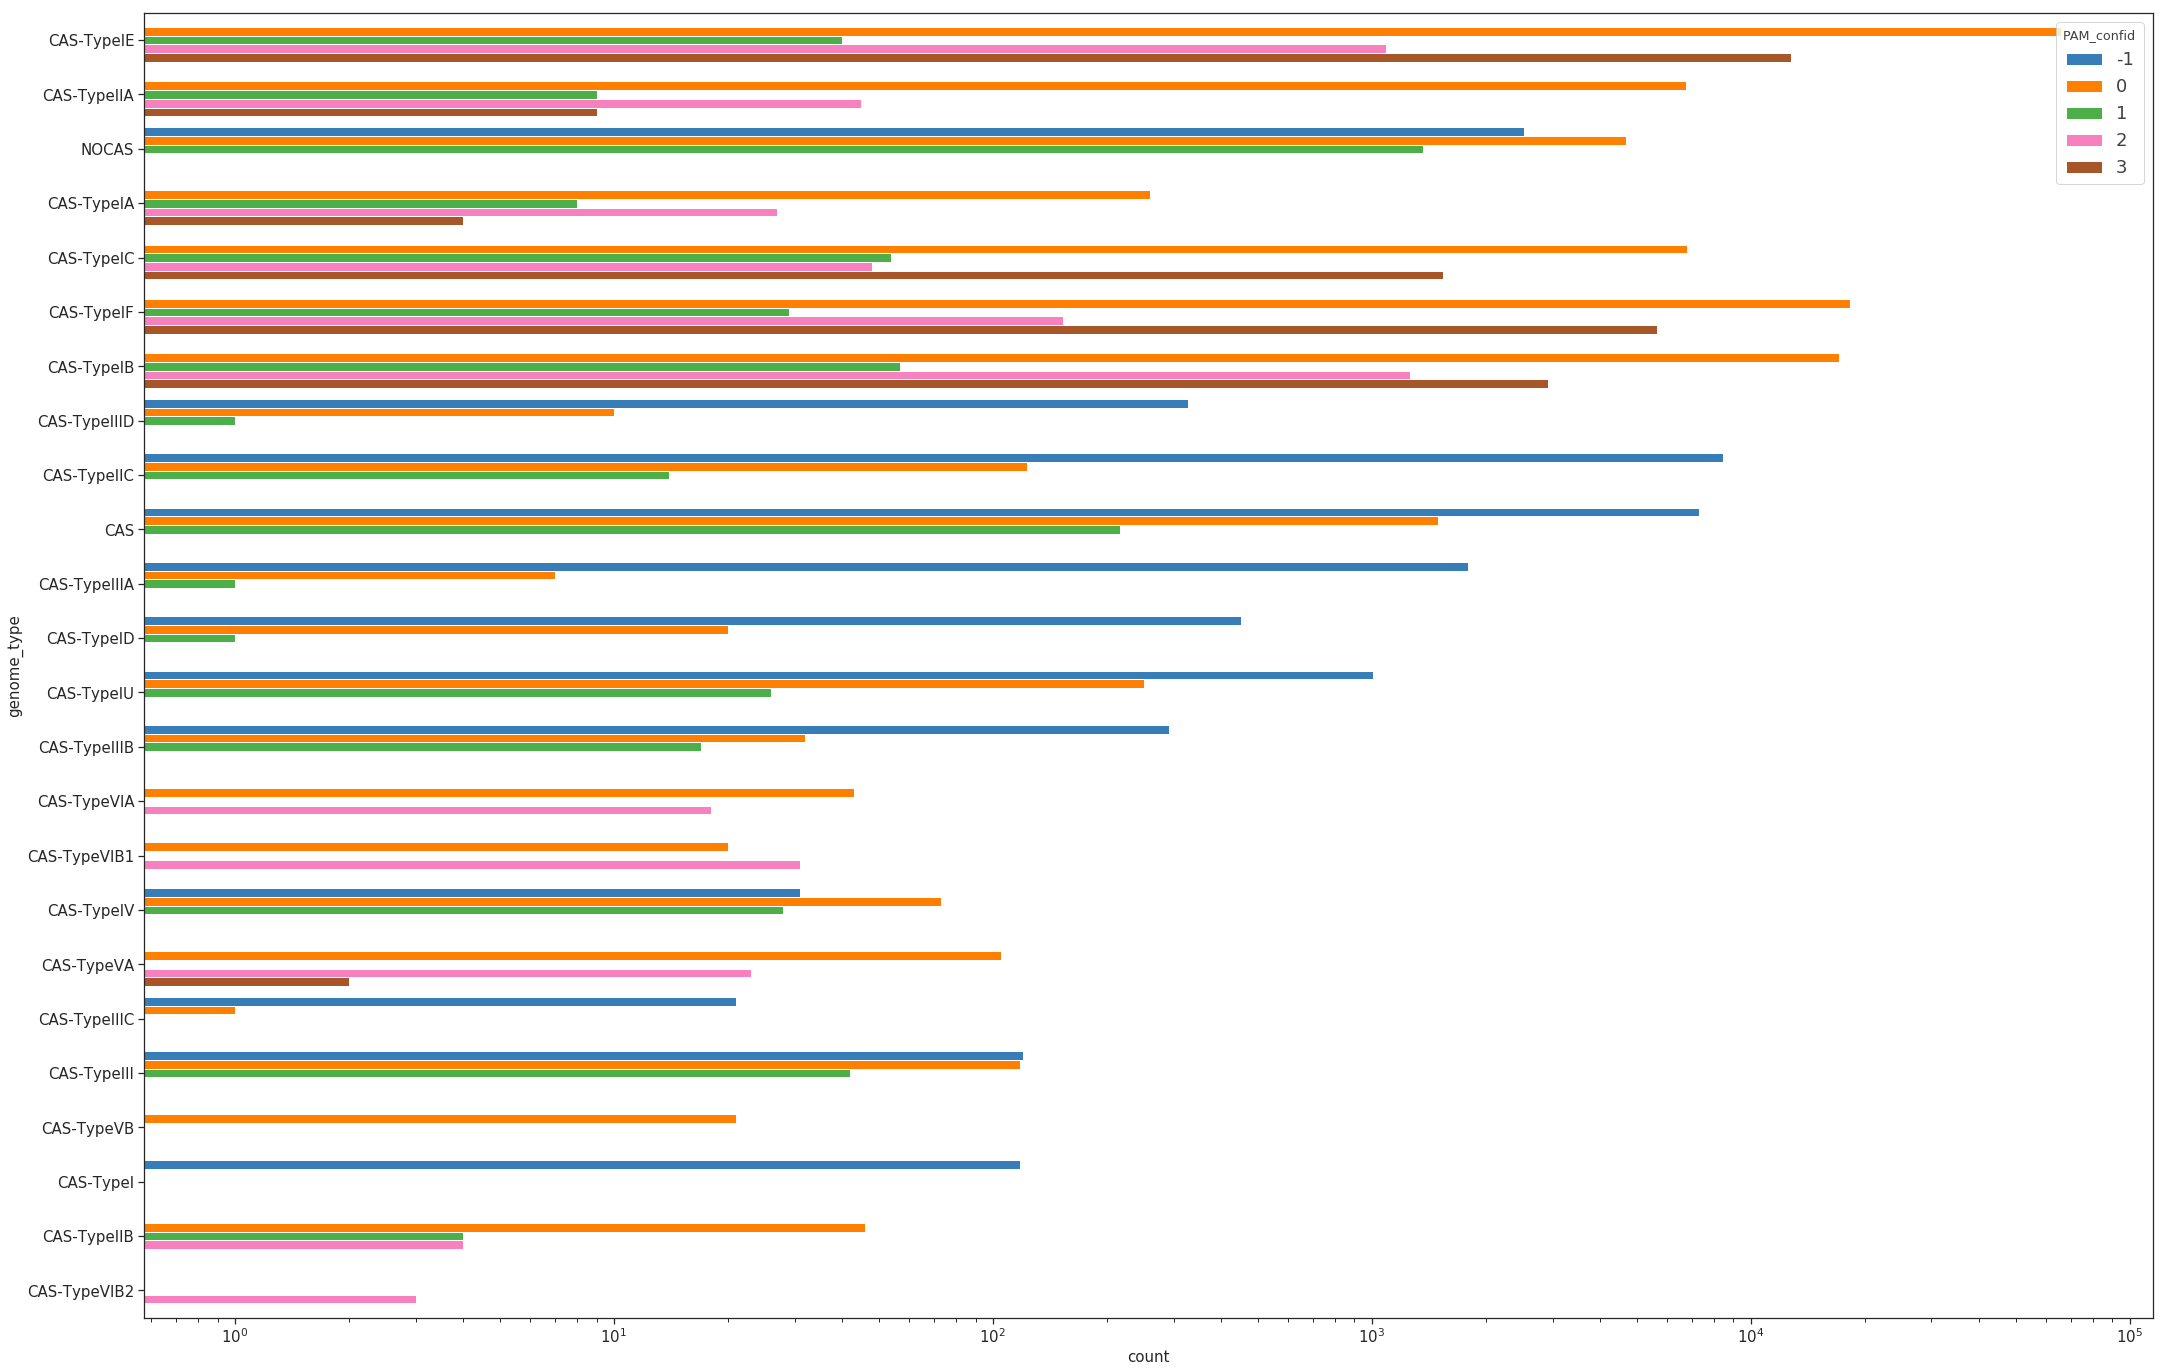

In [15]:
df_single_type = df[~df['genome_type'].str.contains('/')]
ax = sns.countplot(y='genome_type', hue='PAM_confid', data=df_single_type, saturation=100, palette=cbf)
ax.set_xscale('log')
increase_figsize(6, plt)
"""
-1 : no PAM available
0  : PAM incorrect
1  : crispr_type correct
2  : genome_type correct
3  : both correct
"""